In [550]:
# Read the file into a dataframe
import pandas as pd
df = pd.read_csv ("/Users/carlos/Desktop/0313covid19.csv")
#print(df)

In [551]:
# Return a df with all passengers on the Princess Cruise and it's compliment
#cruise = df[df['Province/State'].str.contains("Princess", na=False)]
#notOnCruise = df[~df['Province/State'].str.contains("Princess", na=False)]

In [552]:
# Extricate the regional observations from the global DF
us = df[df['Country/Region'].str.contains("US", na=False)]
china = df[df['Country/Region'].str.contains("China", na=False)]
canada = df[df['Country/Region'].str.contains("Canada", na=False)]
australia = df[df['Country/Region'].str.contains("Australia", na=False)]

### UK France and Denmark
# get rid of the nonUnique Countries in the df (to be appended after they are combined to a single observation)
compliment = df[~df['Country/Region'].str.contains("China|US|Canada|Australia", na=False)]

In [553]:
# Get the sum of all observations in the data frame
## Becareful not to rerun the same cells- because they will continue to append row sums

# Find the average location markers
c1 = canada['Lat'].mean(axis=0)
c2 = canada['Long'].mean(axis=0)
# Get a verctor of the sums and add it as a row in the dataframe
canada = canada.append(canada.sum(numeric_only = True), ignore_index = True)
# Set the nonnumerical elements to an appropriate value
canada.loc[canada.index[-1], 'Country/Region'] = "Canada"
canada.loc[canada.index[-1], 'Lat'] = c1 
canada.loc[canada.index[-1], 'Long'] = c2

# Do the same for China, US, and Australia
c1 = china['Lat'].mean(axis=0)
c2 = china['Long'].mean(axis=0)
china = china.append(china.sum(numeric_only = True), ignore_index = True)
china.loc[china.index[-1], 'Country/Region'] = "China"
china.loc[china.index[-1], 'Lat'] = c1 
china.loc[china.index[-1], 'Long'] = c2

c1 = us['Lat'].mean(axis=0)
c2 = us['Long'].mean(axis=0)
us = us.append(us.sum(numeric_only = True), ignore_index = True)
us.loc[us.index[-1], 'Country/Region'] = "US"
us.loc[us.index[-1], 'Lat'] = c1 
us.loc[us.index[-1], 'Long'] = c2

c1 = australia['Lat'].mean(axis=0)
c2 = australia['Long'].mean(axis=0)
australia = australia.append(australia.sum(numeric_only = True), ignore_index = True)
australia.loc[australia.index[-1], 'Country/Region'] = "Australia"
australia.loc[australia.index[-1], 'Lat'] = c1
australia.loc[australia.index[-1], 'Long'] = c2

c1 = uk['Lat'].mean(axis=0)
c2 = uk['Long'].mean(axis=0)
us = us.append(us.sum(numeric_only = True), ignore_index = True)
us.loc[us.index[-1], 'Country/Region'] = "US"
us.loc[us.index[-1], 'Lat'] = c1 
us.loc[us.index[-1], 'Long'] = c2

c1 = us['Lat'].mean(axis=0)
c2 = us['Long'].mean(axis=0)
us = us.append(us.sum(numeric_only = True), ignore_index = True)
us.loc[us.index[-1], 'Country/Region'] = "US"
us.loc[us.index[-1], 'Lat'] = c1 
us.loc[us.index[-1], 'Long'] = c2

c1 = us['Lat'].mean(axis=0)
c2 = us['Long'].mean(axis=0)
us = us.append(us.sum(numeric_only = True), ignore_index = True)
us.loc[us.index[-1], 'Country/Region'] = "US"
us.loc[us.index[-1], 'Lat'] = c1 
us.loc[us.index[-1], 'Long'] = c2

In [444]:
#notOnCruise.head(10)
#usCruise = pd.merge(us, cruise, how='inner')
#notUsCruise = pd.merge(notOnCruise, cruise, how='inner')
#notUsCruise.head(10)
#usCruise = us[us['Province/State'].isin(cruise['Province/State'])
#usCruise.sum()

In [554]:
# The compliment df has unique values for all remaining countries
compliment['Country/Region'].value_counts()

# Add all of the countries back into the dataframe with the unique countries.
#compliment = compliment.append(us.loc[us.index[-1]])
#compliment = compliment.append(china.loc[china.index[-1]])
#compliment = compliment.append(canada.loc[canada.index[-1]])
#compliment = compliment.append(australia.loc[australia.index[-1]])

United Kingdom    3
France            3
Denmark           2
Cote d'Ivoire     1
Indonesia         1
                 ..
Iraq              1
Mexico            1
Israel            1
Monaco            1
Georgia           1
Name: Country/Region, Length: 112, dtype: int64

In [556]:
# Sort the values by the highest numnber of recent cases
compliment.sort_values(by =['3/12/20'], inplace = True, ascending=False)
compliment.head(10)

/Users/carlos/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20
16,NaN,Italy,43.0000,12.0000,0,0,0,0,0,0,...,2502,3089,3858,4636,5883,7375,9172,10149,12462,12462
157,NaN,Iran,32.0000,53.0000,0,0,0,0,0,0,...,2336,2922,3513,4747,5823,6566,7161,8042,9000,10075
158,NaN,"Korea, South",36.0000,128.0000,1,1,2,2,3,4,...,5186,5621,6088,6593,7041,7314,7478,7513,7755,7869
159,France,France,46.2276,2.2137,0,0,2,3,3,3,...,204,285,377,653,949,1126,1209,1784,2281,2281
18,NaN,Spain,40.0000,-4.0000,0,0,0,0,0,0,...,165,222,259,400,500,673,1073,1695,2277,2277
11,NaN,Germany,51.0000,9.0000,0,0,0,0,0,1,...,196,262,482,670,799,1040,1176,1457,1908,2078
39,NaN,Norway,60.4720,8.4689,0,0,0,0,0,0,...,32,56,87,108,147,176,205,400,598,702
167,Diamond Princess,Cruise Ship,35.4437,139.6380,0,0,0,0,0,0,...,706,706,706,696,696,696,696,696,696,696
31,NaN,Switzerland,46.8182,8.2275,0,0,0,0,0,0,...,56,90,114,214,268,337,374,491,652,652
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,293,331,360,420,461,502,511,581,639,639


In [558]:
# Clean up the dataframe
compliment = compliment.drop(columns=[]'Province/State'])
compliment.loc[compliment['Country/Region'] == "Others",  'Country/Region'] = "Cruise"

SyntaxError: invalid syntax (<ipython-input-558-849e3ef96784>, line 2)

In [448]:
# Get a vector of the sum
globalSum = compliment.append( compliment.sum(numeric_only = True), ignore_index = True)
globalSum.loc[globalSum.index[-1], 'Country/Region'] = "Global"
globalSum.loc[globalSum.index[-1], 'Lat'] = 0 
globalSum.loc[globalSum.index[-1], 'Long'] = 0

#globalSum = globalSum.drop(labels=['Lat','Long'])

#globalSum.columns = ['Cases Worldwide']
globalSum.tail(110)

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20
0,China,33.406936,111.542903,547.0,639.0,916.0,1399.0,2062.0,2863.0,5494.0,...,78824.0,79251.0,79826.0,80026.0,80151.0,80271.0,80422.0,80573.0,80652.0,80699.0
1,Italy,43.000000,12.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,888.0,1128.0,1694.0,2036.0,2502.0,3089.0,3858.0,4636.0,5883.0,7375.0
2,South Korea,36.000000,128.000000,1.0,1.0,2.0,2.0,3.0,4.0,4.0,...,2337.0,3150.0,3736.0,4335.0,5186.0,5621.0,6088.0,6593.0,7041.0,7314.0
3,Iran,32.000000,53.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,388.0,593.0,978.0,1501.0,2336.0,2922.0,3513.0,4747.0,5823.0,6566.0
4,France,47.000000,2.000000,0.0,0.0,2.0,3.0,3.0,3.0,4.0,...,57.0,100.0,130.0,191.0,204.0,285.0,377.0,653.0,949.0,1126.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,Gibraltar,36.140800,-5.353600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
105,Liechtenstein,47.140000,9.550000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
106,Colombia,4.570900,-74.297300,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
107,Nigeria,9.082000,8.675300,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [449]:
#gNums = globalSum.loc[globalSum.index[-1]].plot
#gCol = globalSum.columns.values
#gNums = gNums.drop(labels=['Lat','Long', 'Country/Region'])



#world = pd.DataFrame(gNums, columns=[Cases'])
#world = world.drop(labels=['Lat','Long', 'Country/Region'])
#world.columns.values
#world.head(10)
#world = world.drop(columns=['Lat','Long', 'Country/Region'])
#world.plot
#globalSum.columns = ['Cases Worldwide']

#world.plot.scatter(x= y='Cases Worldwide')

In [559]:
import numpy as np
gCols = globalSum.columns.values
#gCol = np.delete(gCol, [0, 1, 2])
#print(gCol)

world = pd.melt(globalSum, id_vars=['Country/Region'], value_vars=gCol, var_name = 'Date', value_name = 'Cases')
world.head(100)

,Country/Region,Date,Cases
0,China,1/22/20,547.0
1,Italy,1/22/20,0.0
2,South Korea,1/22/20,1.0
3,Iran,1/22/20,0.0
4,France,1/22/20,0.0
...,...,...,...
95,Nepal,1/22/20,0.0
96,Monaco,1/22/20,0.0
97,Armenia,1/22/20,0.0
98,Bhutan,1/22/20,0.0


/Users/carlos/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


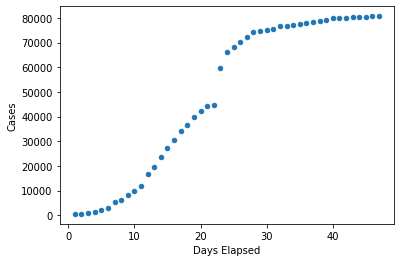

In [562]:
china = world[world['Country/Region'].str.contains("China", na=False)]
listCount = [x for x in range(1, china.shape[0]+1)]
china['Days Elapsed'] = listCount
chinaPlot = china.plot.scatter(x='Days Elapsed', y='Cases')

In [561]:
china['Growth Rate'] = china['Cases'].pct_change().mul(100).round(3)
china.loc[china.index[0], 'Growth Rate'] = 0 
chinaGrowthPlot = china.plot.scatter(x='Days Elapsed', y='Growth Rate')

KeyError: 'Cases'

In [546]:
china.head(80)

,Country/Region,Date,Cases,Days Elapsed,Growth Rate
0,China,01/22/20,547.0,1,0.000
109,China,01/23/20,639.0,2,16.819
218,China,01/24/20,916.0,3,43.349
327,China,01/25/20,1399.0,4,52.729
436,China,01/26/20,2062.0,5,47.391
545,China,01/27/20,2863.0,6,38.846
654,China,01/28/20,5494.0,7,91.897
763,China,01/29/20,6070.0,8,10.484
872,China,01/30/20,8124.0,9,33.839
981,China,01/31/20,9783.0,10,20.421


/Users/carlos/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


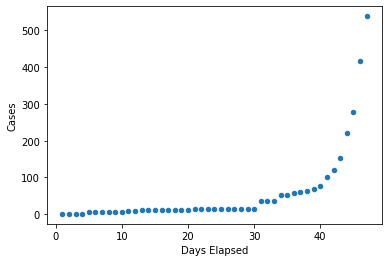

In [547]:
us = world[world['Country/Region'].str.contains("US", na=False)]
listCount = [x for x in range(1, us.shape[0]+1)]
us['Days Elapsed'] = listCount
usPlot = us.plot.scatter(x='Days Elapsed', y='Cases')

/Users/carlos/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


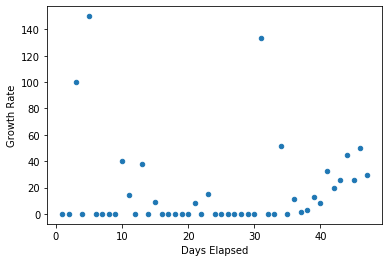

In [548]:
us['Growth Rate'] = us['Cases'].pct_change().mul(100).round(3)
us.loc[us.index[0], 'Growth Rate'] = 0 
usGrowthPlot = us.plot.scatter(x='Days Elapsed', y='Growth Rate')

In [549]:
import seaborn as sns 
import matplotlib.pyplot as plt
